# Read and Understand the data

In [620]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [621]:
# read the dataset
country_df = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
country_df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [622]:
# analyse the details of the country data
country_df.shape

(167, 10)

In [623]:
#Analyse the variables and check for null values.Since there are 167 non-null values in each column, no need of null values handling
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [624]:
country_df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [625]:
# convert imports , exports and health into numbers
country_df['exports_num'] = round((country_df['exports']*country_df['gdpp'])/100,2)
country_df['imports_num'] = round((country_df['imports']*country_df['gdpp'])/100,2)
country_df['health_num'] = round((country_df['health']*country_df['gdpp'])/100,2)

In [626]:
country_df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  exports_num  imports_num  \
0       9.44        56.2       5.82    553        55.30       248.30   
1       4.49        76.3       1.65   4090      1145.20      1987.74   
2      16.10        76.5       2.89   4460      1712.64      1400.44   
3      22.40        60.1       6.16   3530      2199.19      1514.37   
4       1.44        76.8       2.13  12200      5551.00      7185.80   

   health_num  
0       41.92  
1      267.90  
2      185.98  
3      100.60  
4      735.66

In [627]:
# now remove the import,export and health columns as these are no longer required
country_df = country_df.drop('exports',axis = 1)
country_df = country_df.drop('imports',axis = 1)
country_df = country_df.drop('health',axis = 1)

In [628]:
country_df.head()

country  child_mort  income  inflation  life_expec  total_fer  \
0          Afghanistan        90.2    1610       9.44        56.2       5.82   
1              Albania        16.6    9930       4.49        76.3       1.65   
2              Algeria        27.3   12900      16.10        76.5       2.89   
3               Angola       119.0    5900      22.40        60.1       6.16   
4  Antigua and Barbuda        10.3   19100       1.44        76.8       2.13   

    gdpp  exports_num  imports_num  health_num  
0    553        55.30       248.30       41.92  
1   4090      1145.20      1987.74      267.90  
2   4460      1712.64      1400.44      185.98  
3   3530      2199.19      1514.37      100.60  
4  12200      5551.00      7185.80      735.66

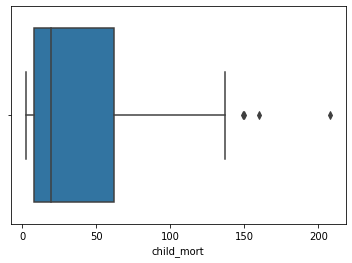

In [629]:
# Undersanding the data by doing Univariate Analysis
sns.boxplot(country_df.child_mort)

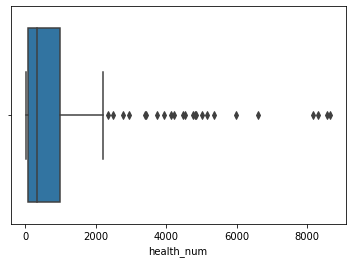

In [630]:
sns.boxplot(country_df.health_num)

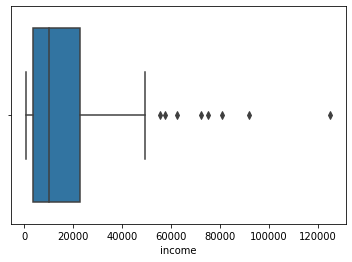

In [631]:
sns.boxplot(country_df.income)

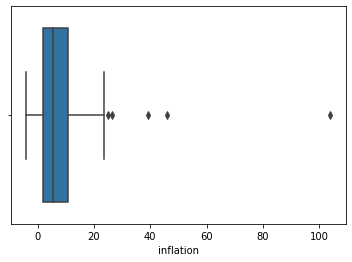

In [632]:
sns.boxplot(country_df.inflation)

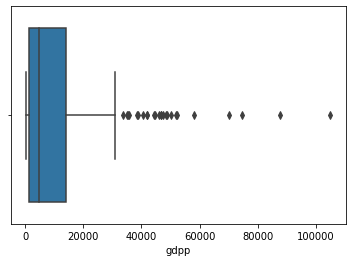

In [633]:
sns.boxplot(country_df.gdpp)

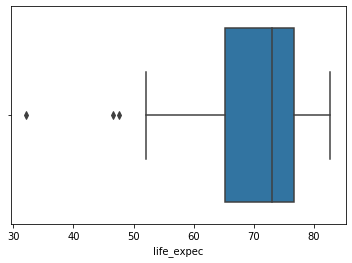

In [634]:
sns.boxplot(country_df.life_expec)

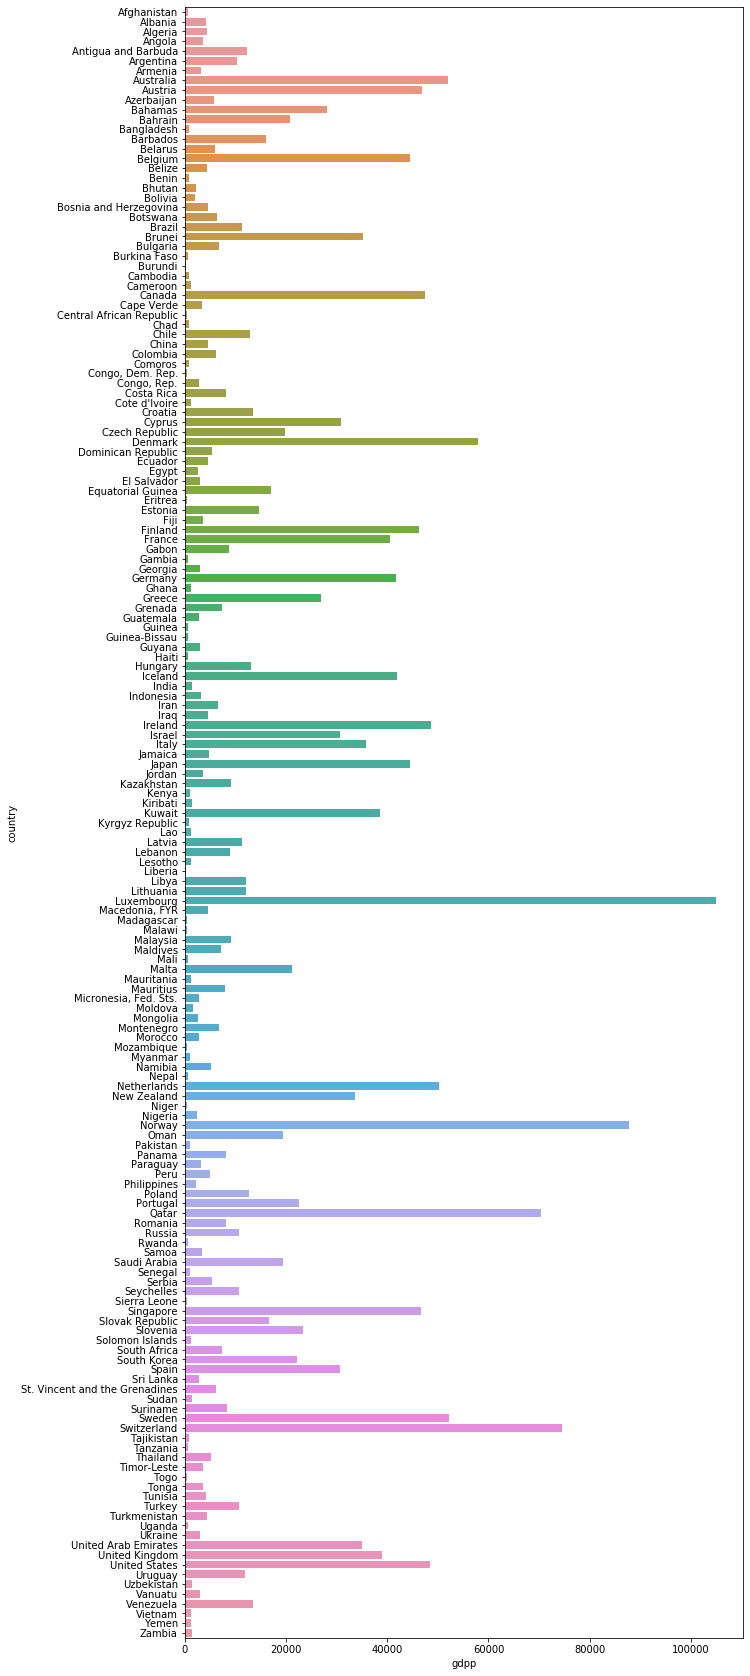

In [635]:
# gdpp vs country plot
plt.figure(figsize = (10,30))
plt.xlabel('gdpp')
plt.ylabel('country')
sns.barplot(x = country_df.gdpp,y = country_df.country, data = country_df)
plt.show()

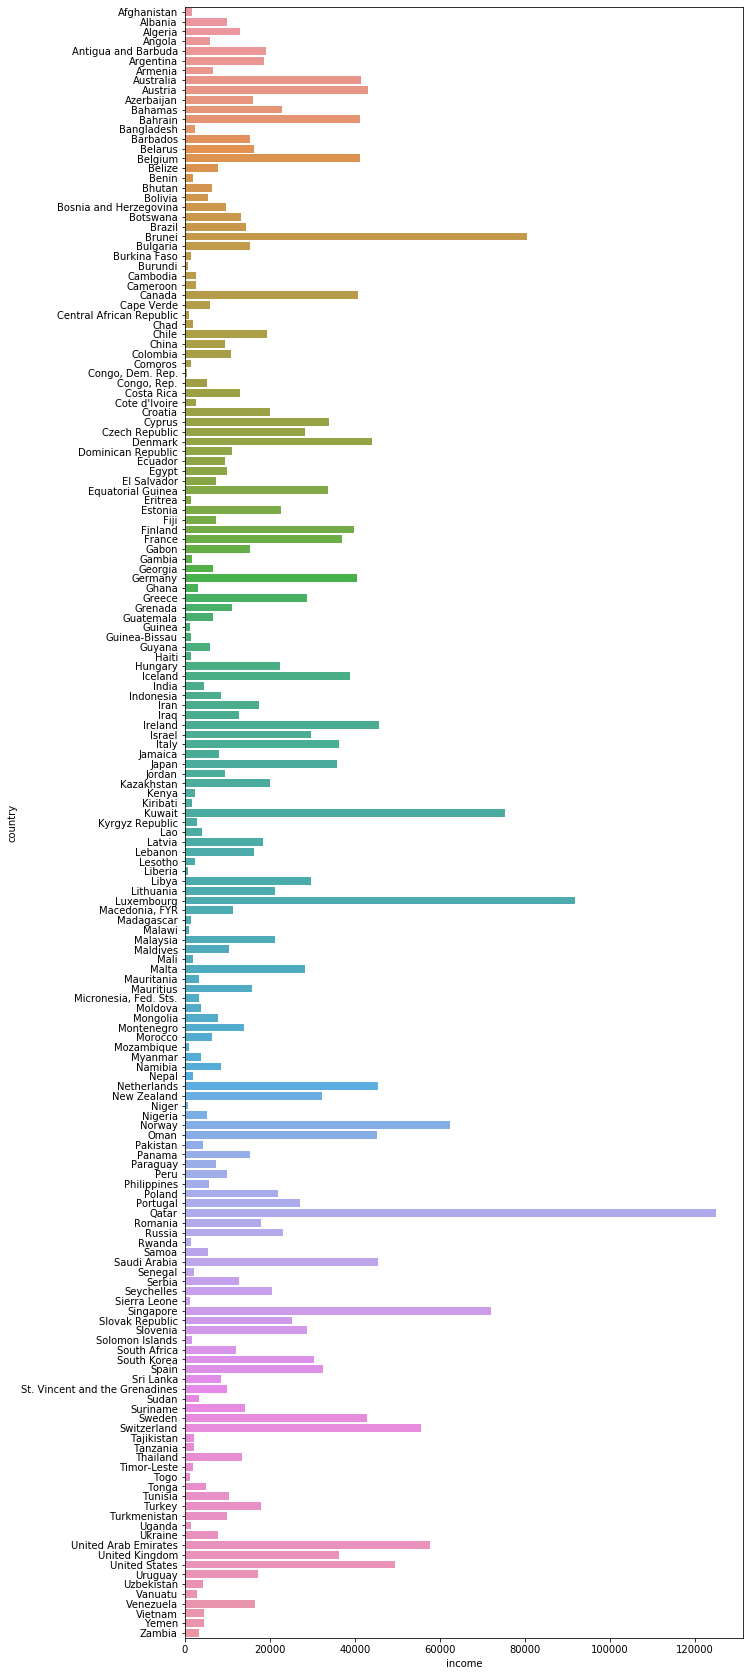

In [636]:
plt.figure(figsize = (10,30))
plt.xlabel('income')
plt.ylabel('country')
sns.barplot(x = country_df.income,y = country_df.country, data = country_df)
plt.show()

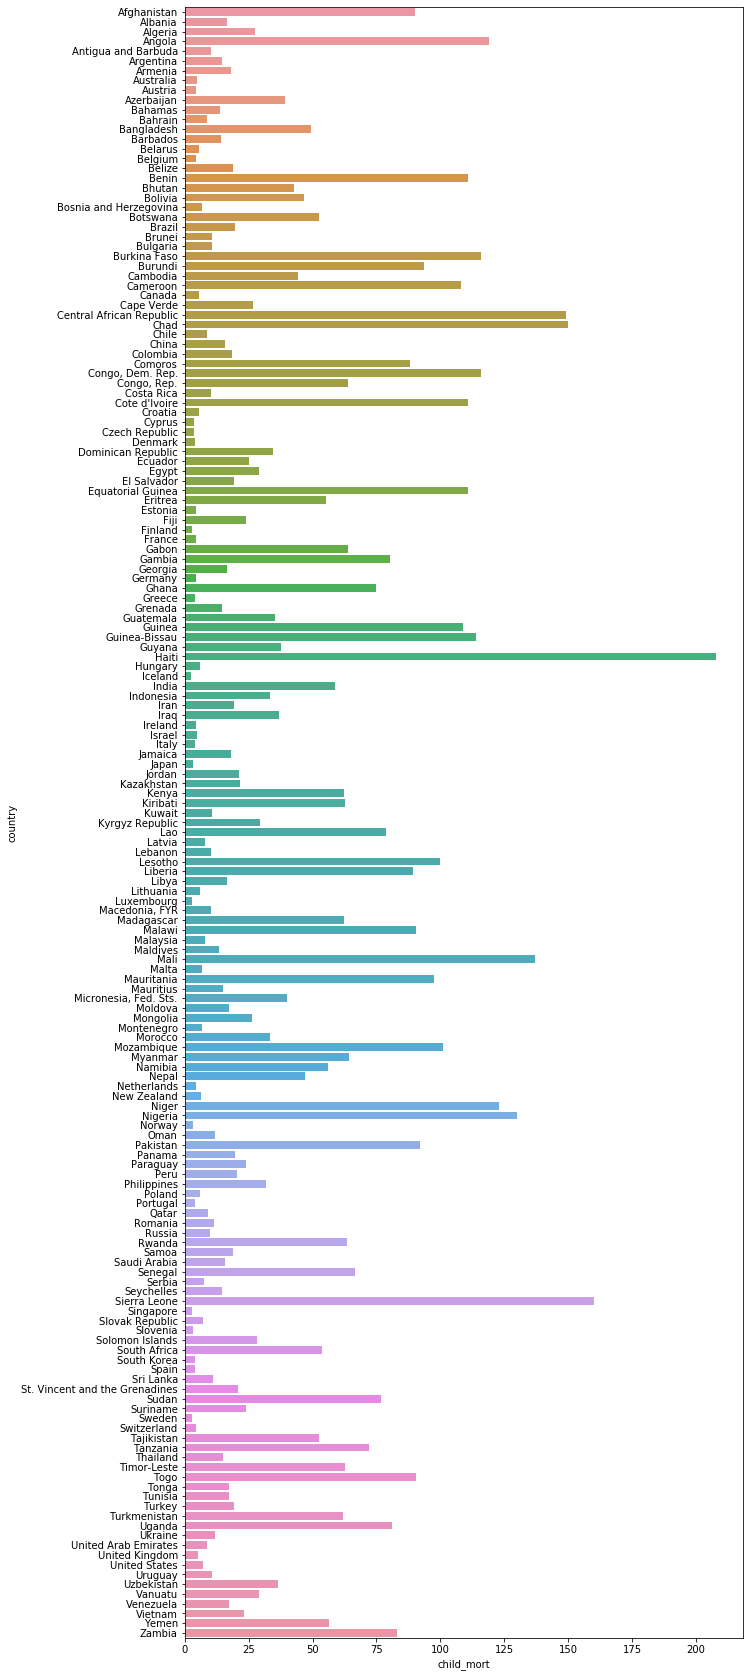

In [637]:
plt.figure(figsize = (10,30))
plt.xlabel('child mortality per 1000 births')
plt.ylabel('country')
sns.barplot(x = country_df.child_mort,y = country_df.country, data = country_df)
plt.show()

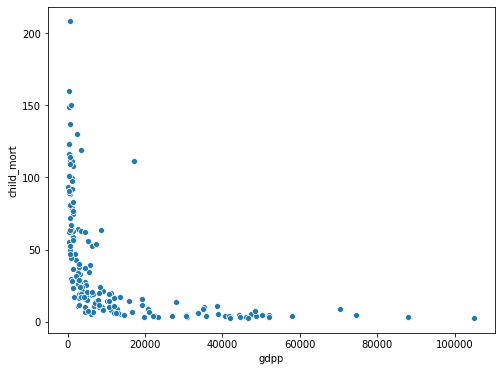

In [638]:
# scatter plot for gdpp and child mortality rate
plt.figure(figsize = (8,6))
#plt.xlabel('gdpp')
#plt.ylabel('child mortality')
sns.scatterplot(x = country_df.gdpp,y = country_df.child_mort, data = country_df)
plt.show()

In [639]:
# scatter plot for health spendings and child mortality rate
plt.figure(figsize = (8,6))
sns.scatterplot(x = country_df.health_num,y = country_df.child_mort, data = country_df)
plt.show()

In [640]:
# Heatmap
country_corr = country_df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(country_corr, annot = True)

# Outlier Treatment

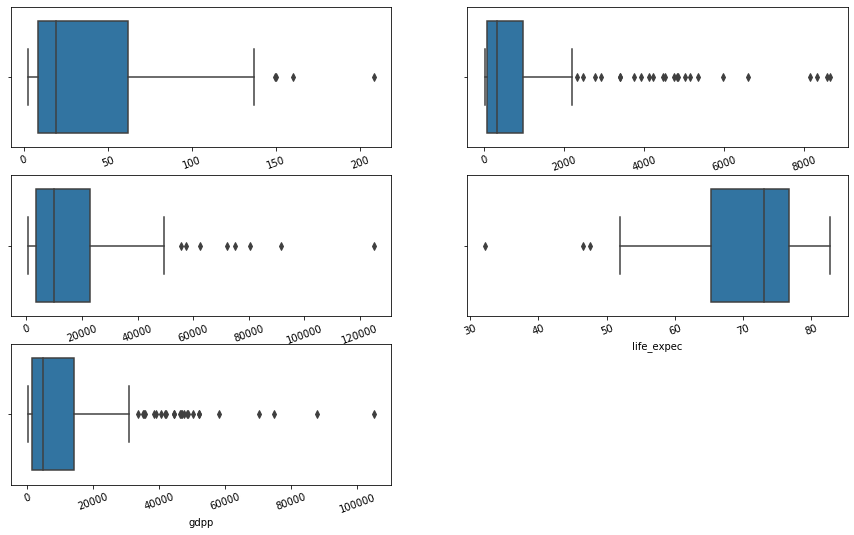

In [641]:
#Before outlier treatment boxplots for the fields which will undergo the outliers treatment
plt.figure(figsize=(15,15))
features = ['child_mort', 'health_num', 'income', 'life_expec', 'gdpp']
for i in enumerate(features): 
    ax = plt.subplot(5, 2, i[0]+1)
    sns.boxplot(x=i[1], data=country_df)
    plt.xticks(rotation = 20)

In [642]:
#child_mort outlier treatment
Q1 = country_df['child_mort'].quantile(0.01)
Q4 = country_df['child_mort'].quantile(0.99)
country_df['child_mort'][country_df['child_mort'] <= Q1]=Q1
country_df['child_mort'][country_df['child_mort'] >= Q4]=Q4
country_df.shape

(167, 10)

In [643]:
#health_num outlier treatment
Q1 = country_df['health_num'].quantile(0.01)
Q4 = country_df['health_num'].quantile(0.99)
country_df['health_num'][country_df['health_num'] <= Q1]=Q1
country_df['health_num'][country_df['health_num'] >= Q4]=Q4
country_df.shape

(167, 10)

In [644]:
# outlier treatment
Q1 = country_df['health_num'].quantile(0.01)
Q4 = country_df['health_num'].quantile(0.99)
country_df['health_num'][country_df['health_num'] <= Q1]=Q1
country_df['health_num'][country_df['health_num'] >= Q4]=Q4
country_df.shape

(167, 10)

In [645]:
# outlier treatment
Q1 = country_df['income'].quantile(0.01)
Q4 = country_df['income'].quantile(0.99)
country_df['income'][country_df['income'] <= Q1]=Q1
country_df['income'][country_df['income'] >= Q4]=Q4
country_df.shape

(167, 10)

In [646]:
# outlier treatment
Q1 = country_df['life_expec'].quantile(0.01)
Q4 = country_df['life_expec'].quantile(0.99)
country_df['life_expec'][country_df['life_expec'] <= Q1]=Q1
country_df['life_expec'][country_df['life_expec'] >= Q4]=Q4
country_df.shape

(167, 10)

In [647]:
# outlier treatment
Q1 = country_df['gdpp'].quantile(0.01)
Q4 = country_df['gdpp'].quantile(0.99)
country_df['gdpp'][country_df['gdpp'] <= Q1]=Q1
country_df['gdpp'][country_df['gdpp'] >= Q4]=Q4
country_df.shape

(167, 10)

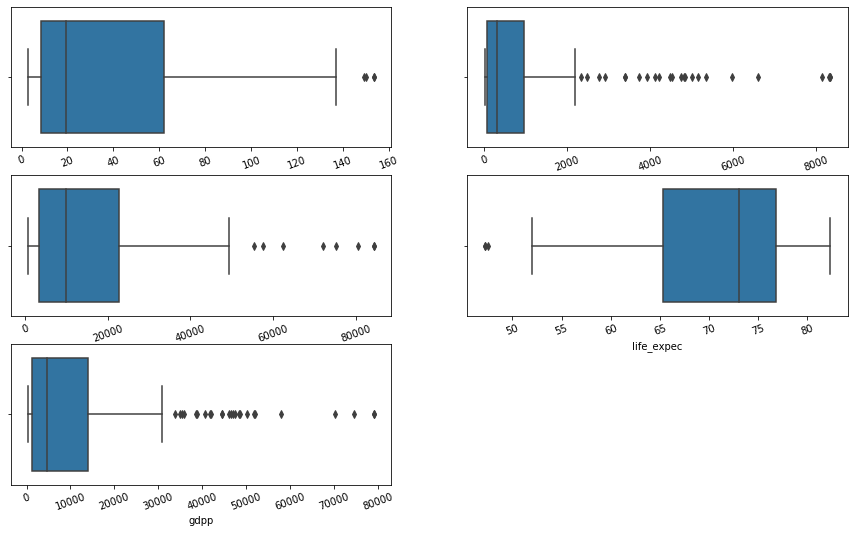

In [648]:
plt.figure(figsize=(15,15))
features = ['child_mort', 'health_num', 'income', 'life_expec', 'gdpp']
for i in enumerate(features): 
    ax = plt.subplot(5, 2, i[0]+1)
    sns.boxplot(x=i[1], data=country_df)
    plt.xticks(rotation = 20)

In [649]:
# check Hopkins measure
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

round(hopkins(country_df.drop('country', axis = 1)),2)

0.96

In [650]:
# For performing the clsutering create a new df without country
country_df1 = country_df.drop('country', axis = 1)

In [651]:
country_df1.shape

(167, 9)

In [652]:
country_df1.head()

child_mort   income  inflation  life_expec  total_fer     gdpp  \
0        90.2   1610.0       9.44        56.2       5.82    553.0   
1        16.6   9930.0       4.49        76.3       1.65   4090.0   
2        27.3  12900.0      16.10        76.5       2.89   4460.0   
3       119.0   5900.0      22.40        60.1       6.16   3530.0   
4        10.3  19100.0       1.44        76.8       2.13  12200.0   

   exports_num  imports_num  health_num  
0        55.30       248.30       41.92  
1      1145.20      1987.74      267.90  
2      1712.64      1400.44      185.98  
3      2199.19      1514.37      100.60  
4      5551.00      7185.80      735.66

# Scaling the data

In [653]:
# country_df1 will contain the scales data
standard_scaler = StandardScaler()
country_df1 = standard_scaler.fit_transform(country_df1)

In [654]:
country_df1 = pd.DataFrame(country_df1)
country_df1.columns = ["child_mort","income","inflation","life_expec","total_fer","gdpp", "exports_num", "health_num", "imports_num"]
country_df1.head()

child_mort    income  inflation  life_expec  total_fer      gdpp  \
0    1.344012 -0.851772   0.157336   -1.693799   1.902882 -0.702314   
1   -0.547543 -0.387025  -0.312347    0.663053  -0.859973 -0.498775   
2   -0.272548 -0.221124   0.789274    0.686504  -0.038404 -0.477483   
3    2.084186 -0.612136   1.387054   -1.236499   2.128151 -0.531000   
4   -0.709457  0.125202  -0.601749    0.721681  -0.541946 -0.032079   

   exports_num  health_num  imports_num  
0    -0.411011   -0.432275    -0.567498  
1    -0.350191   -0.313677    -0.440730  
2    -0.318526   -0.353720    -0.486685  
3    -0.291375   -0.345953    -0.534580  
4    -0.104331    0.040735    -0.178331

In [655]:
country_df1.describe()

child_mort        income     inflation    life_expec     total_fer  \
count  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02   
mean  -5.717316e-17 -1.728491e-17  8.376533e-17  1.598189e-15  3.124580e-16   
std    1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00   
min   -9.022102e-01 -9.002438e-01 -1.137852e+00 -2.753796e+00 -1.191250e+00   
25%   -7.621425e-01 -7.542976e-01 -5.666409e-01 -6.267666e-01 -7.639023e-01   
50%   -4.781521e-01 -3.853490e-01 -2.269504e-01  2.878326e-01 -3.564309e-01   
75%    6.218286e-01  3.318805e-01  2.816364e-01  7.216810e-01  6.175252e-01   
max    2.968283e+00  3.771342e+00  9.129718e+00  1.374799e+00  3.009349e+00   

               gdpp   exports_num    health_num   imports_num  
count  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02  
mean  -3.988825e-17  1.196648e-16 -5.517875e-17 -3.656423e-17  
std    1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00  
min   -7.150535e-01 -4.140370e-01 -4.491605e-01 -5.811977e-01  
25%   -6.576010e-01 -3.891452e-01 -4.055539e-01 -5.469579e-01  
50%   -4.659738e-01 -3.149097e-01 -3.097338e-01 -4.104434e-01  
75%    7.438032e-02 -7.958646e-03  7.713036e-02 -4.298104e-02  
max    3.817038e+00  9.839814e+00  9.716681e+00  4.094746e+00

# K-means clustering

For n_clusters=2, the silhouette score is 0.4632498333801359
For n_clusters=3, the silhouette score is 0.4268837323184261
For n_clusters=4, the silhouette score is 0.4333850718782767
For n_clusters=5, the silhouette score is 0.43764212170394473
For n_clusters=6, the silhouette score is 0.3729825157441783
For n_clusters=7, the silhouette score is 0.30857284056886725
For n_clusters=8, the silhouette score is 0.3026626601119902
For n_clusters=9, the silhouette score is 0.3113447150557883


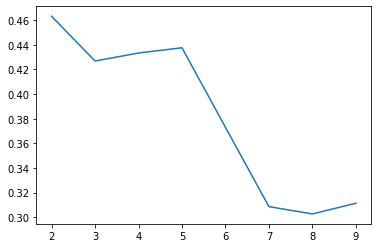

In [656]:
# silhouette score analysis for finding the optimum number of clusters
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(country_df1)
    ss.append([k, silhouette_score(country_df1, kmeans.labels_)])
    
    silhouette_avg = silhouette_score(country_df1, kmeans.labels_)
    print("For n_clusters={0}, the silhouette score is {1}".format(k, silhouette_avg))
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

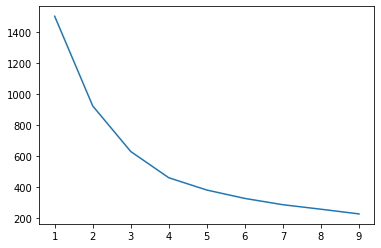

In [657]:
#The elbow curve
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(country_df1)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

In [658]:
# perform K means using K=3
kmean = KMeans(n_clusters = 3, max_iter = 50, random_state = 50)
kmean.fit(country_df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [659]:
#Make a copy of original data
country_org = country_df.copy()
country_org.head()

country  child_mort   income  inflation  life_expec  total_fer  \
0          Afghanistan        90.2   1610.0       9.44        56.2       5.82   
1              Albania        16.6   9930.0       4.49        76.3       1.65   
2              Algeria        27.3  12900.0      16.10        76.5       2.89   
3               Angola       119.0   5900.0      22.40        60.1       6.16   
4  Antigua and Barbuda        10.3  19100.0       1.44        76.8       2.13   

      gdpp  exports_num  imports_num  health_num  
0    553.0        55.30       248.30       41.92  
1   4090.0      1145.20      1987.74      267.90  
2   4460.0      1712.64      1400.44      185.98  
3   3530.0      2199.19      1514.37      100.60  
4  12200.0      5551.00      7185.80      735.66

In [660]:
country_df.head()

country  child_mort   income  inflation  life_expec  total_fer  \
0          Afghanistan        90.2   1610.0       9.44        56.2       5.82   
1              Albania        16.6   9930.0       4.49        76.3       1.65   
2              Algeria        27.3  12900.0      16.10        76.5       2.89   
3               Angola       119.0   5900.0      22.40        60.1       6.16   
4  Antigua and Barbuda        10.3  19100.0       1.44        76.8       2.13   

      gdpp  exports_num  imports_num  health_num  
0    553.0        55.30       248.30       41.92  
1   4090.0      1145.20      1987.74      267.90  
2   4460.0      1712.64      1400.44      185.98  
3   3530.0      2199.19      1514.37      100.60  
4  12200.0      5551.00      7185.80      735.66

In [661]:
col = country_df.columns
col

Index(['country', 'child_mort', 'income', 'inflation', 'life_expec',
       'total_fer', 'gdpp', 'exports_num', 'imports_num', 'health_num'],
      dtype='object')

In [662]:
# add cluster ids to original data
df_kmeans = pd.concat([country_df.reset_index().drop('index', axis = 1), pd.Series(kmean.labels_)], axis = 1)
df_kmeans.columns = ['country', 'child_mort', 'income', 'inflation', 'life_expec','total_fer','gdpp','exports_num','imports_num','health_num','cluster_id']
df_kmeans.head()

country  child_mort   income  inflation  life_expec  total_fer  \
0          Afghanistan        90.2   1610.0       9.44        56.2       5.82   
1              Albania        16.6   9930.0       4.49        76.3       1.65   
2              Algeria        27.3  12900.0      16.10        76.5       2.89   
3               Angola       119.0   5900.0      22.40        60.1       6.16   
4  Antigua and Barbuda        10.3  19100.0       1.44        76.8       2.13   

      gdpp  exports_num  imports_num  health_num  cluster_id  
0    553.0        55.30       248.30       41.92           2  
1   4090.0      1145.20      1987.74      267.90           0  
2   4460.0      1712.64      1400.44      185.98           0  
3   3530.0      2199.19      1514.37      100.60           2  
4  12200.0      5551.00      7185.80      735.66           0

In [663]:
#check for null values in the k-means dataframe
df_kmeans.isnull().sum()

country        0
child_mort     0
income         0
inflation      0
life_expec     0
total_fer      0
gdpp           0
exports_num    0
imports_num    0
health_num     0
cluster_id     0
dtype: int64

In [664]:
# Check the count of countries per cluster
df_kmeans['cluster_id'].value_counts()

0    91
2    48
1    28
Name: cluster_id, dtype: int64

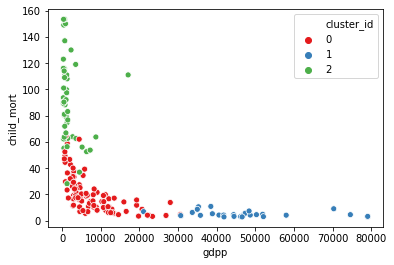

In [665]:
# Plot the Clusters
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster_id', legend = 'full', data = df_kmeans, palette='Set1')

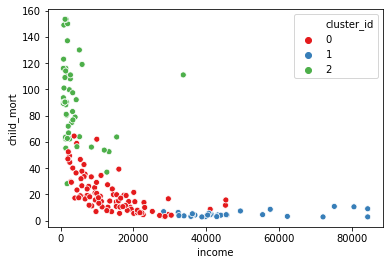

In [666]:
sns.scatterplot(x = 'income', y = 'child_mort', hue ='cluster_id', legend = 'full', data = df_kmeans, palette='Set1')

# Cluster Profiling

In [667]:
df_kmeans.head()

country  child_mort   income  inflation  life_expec  total_fer  \
0          Afghanistan        90.2   1610.0       9.44        56.2       5.82   
1              Albania        16.6   9930.0       4.49        76.3       1.65   
2              Algeria        27.3  12900.0      16.10        76.5       2.89   
3               Angola       119.0   5900.0      22.40        60.1       6.16   
4  Antigua and Barbuda        10.3  19100.0       1.44        76.8       2.13   

      gdpp  exports_num  imports_num  health_num  cluster_id  
0    553.0        55.30       248.30       41.92           2  
1   4090.0      1145.20      1987.74      267.90           0  
2   4460.0      1712.64      1400.44      185.98           0  
3   3530.0      2199.19      1514.37      100.60           2  
4  12200.0      5551.00      7185.80      735.66           0

In [668]:
df_kmeans.drop('country', axis = 1).groupby('cluster_id').mean()

child_mort        income  inflation  life_expec  total_fer  \
cluster_id                                                               
0            20.357143  13968.021978   7.070549   73.460440   2.235055   
1             5.053571  48466.000000   3.014679   80.487143   1.760714   
2            90.335417   3901.010000  11.911146   59.567083   4.992083   

                    gdpp   exports_num   imports_num   health_num  
cluster_id                                                         
0            7979.912088   3604.149451   3710.446374   547.279231  
1           46877.714286  31038.239286  25818.100000  4307.997695  
2            1911.400833    879.063542    827.028750   114.959708

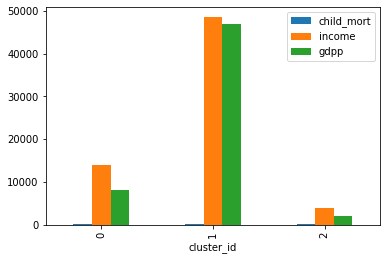

In [669]:
df_kmeans.drop('country', axis = 1)[['child_mort','income','gdpp','cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

In [670]:
df_kmeans[df_kmeans['cluster_id']==2]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [671]:
df_kmeans[df_kmeans['cluster_id']==2].sort_values(by=["gdpp","income","child_mort"], ascending=[True, True, False])

country  child_mort    income  inflation  life_expec  \
88                    Liberia        89.3    742.24      5.470       60.80   
26                    Burundi        93.6    764.00     12.300       57.70   
37           Congo, Dem. Rep.       116.0    742.24     20.800       57.50   
112                     Niger       123.0    814.00      2.550       58.80   
132              Sierra Leone       153.4   1220.00     17.200       55.00   
93                 Madagascar        62.2   1390.00      8.790       60.80   
106                Mozambique       101.0    918.00      7.640       54.50   
31   Central African Republic       149.0    888.00      2.010       47.50   
94                     Malawi        90.5   1030.00     12.100       53.10   
50                    Eritrea        55.2   1420.00     11.600       61.70   
150                      Togo        90.3   1210.00      1.180       58.70   
64              Guinea-Bissau       114.0   1390.00      2.970       55.60   
0                 Afghanistan        90.2   1610.00      9.440       56.20   
56                     Gambia        80.3   1660.00      4.300       65.50   
126                    Rwanda        63.6   1350.00      2.610       64.60   
25               Burkina Faso       116.0   1430.00      6.810       57.90   
155                    Uganda        81.0   1540.00     10.600       56.80   
63                     Guinea       109.0   1190.00     16.100       58.00   
66                      Haiti       153.4   1500.00      5.450       47.16   
147                  Tanzania        71.9   2090.00      9.250       59.30   
97                       Mali       137.0   1870.00      4.370       59.50   
17                      Benin       111.0   1820.00      0.885       61.80   
36                    Comoros        88.2   1410.00      3.870       65.90   
32                       Chad       150.0   1930.00      6.390       56.50   
80                      Kenya        62.2   2480.00      2.090       62.80   
129                   Senegal        66.8   2180.00      1.850       64.00   
116                  Pakistan        92.1   4280.00     10.900       65.30   
84                        Lao        78.9   3980.00      9.200       63.80   
87                    Lesotho        99.7   2380.00      4.150       47.16   
99                 Mauritania        97.4   3320.00     18.900       68.20   
40              Cote d'Ivoire       111.0   2690.00      5.390       56.30   
136           Solomon Islands        28.1   1780.00      6.810       61.70   
28                   Cameroon       108.0   2660.00      1.910       57.30   
59                      Ghana        74.7   3060.00     16.600       62.20   
165                     Yemen        56.3   4480.00     23.600       67.50   
166                    Zambia        83.1   3280.00     14.000       52.00   
142                     Sudan        76.7   3370.00     19.600       66.30   
81                   Kiribati        62.7   1730.00      1.520       60.70   
113                   Nigeria       130.0   5150.00    104.000       60.50   
38                Congo, Rep.        63.9   5190.00     20.700       60.40   
3                      Angola       119.0   5900.00     22.400       60.10   
149               Timor-Leste        62.6   1850.00     26.500       71.10   
72                       Iraq        36.9  12700.00     16.600       67.20   
108                   Namibia        56.0   8460.00      3.560       58.60   
21                   Botswana        52.5  13300.00      8.920       57.10   
137              South Africa        53.7  12000.00      6.350       54.30   
55                      Gabon        63.7  15400.00     16.600       62.90   
49          Equatorial Guinea       111.0  33700.00     24.900       60.90   

     total_fer      gdpp  exports_num  imports_num  health_num  cluster_id  
88        5.02    331.62        62.46       302.80   38.590000           2  
26        6.26    331.62        20.61        

# Hierarchical Clustering

In [672]:
country_df1.head()

child_mort    income  inflation  life_expec  total_fer      gdpp  \
0    1.344012 -0.851772   0.157336   -1.693799   1.902882 -0.702314   
1   -0.547543 -0.387025  -0.312347    0.663053  -0.859973 -0.498775   
2   -0.272548 -0.221124   0.789274    0.686504  -0.038404 -0.477483   
3    2.084186 -0.612136   1.387054   -1.236499   2.128151 -0.531000   
4   -0.709457  0.125202  -0.601749    0.721681  -0.541946 -0.032079   

   exports_num  health_num  imports_num  
0    -0.411011   -0.432275    -0.567498  
1    -0.350191   -0.313677    -0.440730  
2    -0.318526   -0.353720    -0.486685  
3    -0.291375   -0.345953    -0.534580  
4    -0.104331    0.040735    -0.178331

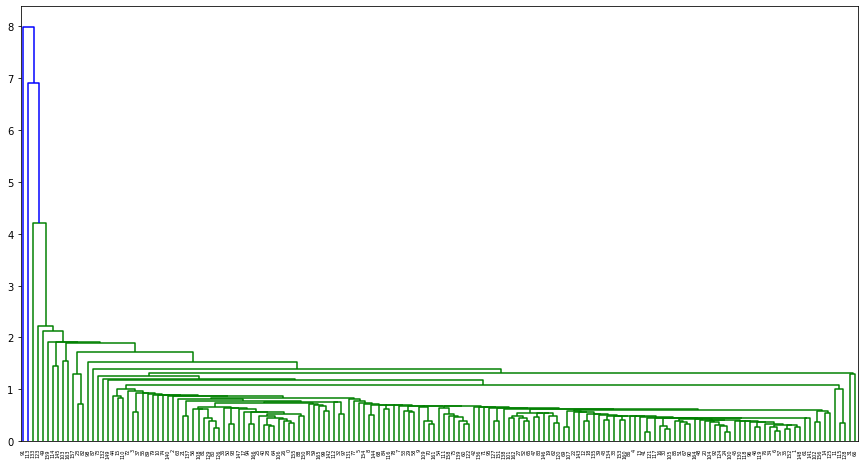

In [673]:
# single linkage
plt.figure(figsize = (15,8))
linkages = linkage(country_df1, method="single", metric='euclidean')
dendrogram(linkages)
plt.show()

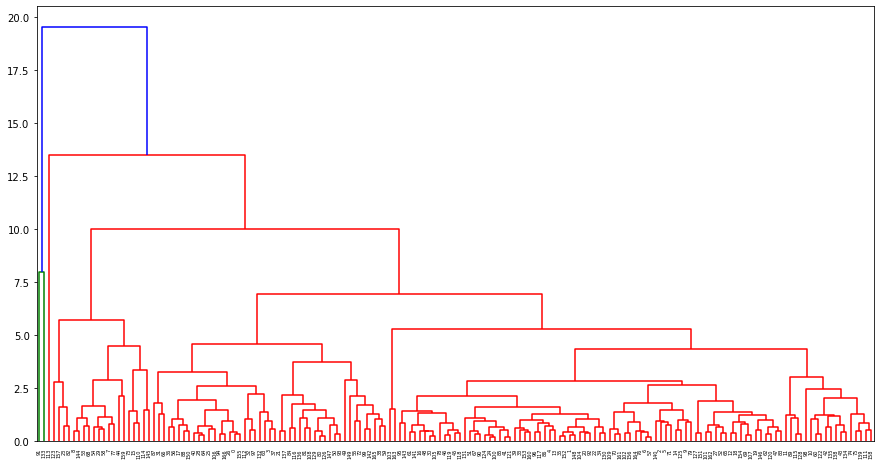

In [674]:
# complete linkage
plt.figure(figsize = (15,8))
linkages = linkage(country_df1, method="complete", metric='euclidean')
dendrogram(linkages)
plt.show()

In [675]:
# 4 clusters 
cluster_labels = cut_tree(linkages, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [676]:
# assign cluster labels
country_df['cluster_labels'] = cluster_labels
country_df.head()

country  child_mort   income  inflation  life_expec  total_fer  \
0          Afghanistan        90.2   1610.0       9.44        56.2       5.82   
1              Albania        16.6   9930.0       4.49        76.3       1.65   
2              Algeria        27.3  12900.0      16.10        76.5       2.89   
3               Angola       119.0   5900.0      22.40        60.1       6.16   
4  Antigua and Barbuda        10.3  19100.0       1.44        76.8       2.13   

      gdpp  exports_num  imports_num  health_num  cluster_labels  
0    553.0        55.30       248.30       41.92               0  
1   4090.0      1145.20      1987.74      267.90               0  
2   4460.0      1712.64      1400.44      185.98               0  
3   3530.0      2199.19      1514.37      100.60               0  
4  12200.0      5551.00      7185.80      735.66               0

In [677]:
country_df.cluster_labels.value_counts()

0    144
1     20
2      2
3      1
Name: cluster_labels, dtype: int64

In [678]:
country_df.drop('country', axis = 1).groupby('cluster_labels').mean()

child_mort        income   inflation  life_expec  total_fer  \
cluster_labels                                                                
0                42.279167  11476.308889    7.797042   69.226528   3.103264   
1                 5.315000  50058.700000    3.460900   80.248500   1.841000   
2                 2.800000  78237.000000    1.787000   81.835000   1.390000   
3               130.000000   5150.000000  104.000000   60.500000   5.840000   

                        gdpp    exports_num    imports_num   health_num  
cluster_labels                                                           
0                6990.203056    3162.213611    3239.784583   502.503028  
1               49794.400000   25317.255000   20156.820000  4673.099274  
2               62844.000000  138475.000000  115092.000000  5001.930000  
3                2330.000000     589.490000     405.420000   118.130000

In [679]:
country_df.drop('country', axis = 1)[['child_mort','income','gdpp','cluster_labels']].groupby('cluster_labels').mean().plot(kind = 'bar')

In [680]:
country_df[country_df['cluster_labels']==0]['country']

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 144, dtype: object

In [681]:
country_df[country_df['cluster_labels']==0].sort_values(by=["gdpp","income","child_mort"], ascending=[True, True, False])

country  child_mort    income  inflation  life_expec  total_fer  \
88            Liberia        89.3    742.24      5.470        60.8       5.02   
26            Burundi        93.6    764.00     12.300        57.7       6.26   
37   Congo, Dem. Rep.       116.0    742.24     20.800        57.5       6.54   
112             Niger       123.0    814.00      2.550        58.8       7.49   
132      Sierra Leone       153.4   1220.00     17.200        55.0       5.20   
..                ...         ...       ...        ...         ...        ...   
139             Spain         3.8  32500.00      0.160        81.9       1.37   
42             Cyprus         3.6  33900.00      2.010        79.9       1.42   
111       New Zealand         6.2  32300.00      3.730        80.9       2.17   
75              Italy         4.0  36200.00      0.319        81.7       1.46   
158    United Kingdom         5.2  36200.00      1.570        80.3       1.92   

         gdpp  exports_num  imports_num  health_num  cluster_labels  
88     331.62        62.46       302.80       38.59               0  
26     331.62        20.61        90.55       26.80               0  
37     334.00       137.27       165.66       26.42               0  
112    348.00        77.26       170.87       17.96               0  
132    399.00        67.03       137.66       52.27               0  
..        ...          ...          ...         ...             ...  
139  30700.00      7828.50      8227.60     2928.78               0  
42   30800.00     15461.60     17710.00     1838.76               0  
111  33700.00     10211.10      9436.00     3403.70               0  
75   35800.00      9021.60      9737.60     3411.74               0  
158  38900.00     10969.80     11981.20     3749.96               0  

[144 rows x 11 columns]

# The Top 5 countries which are in need of aid are below as per both k-means and hierarchical clustering
1. Liberia
2. Burundi
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone